#### Case 2: Isobaric evaporation of liquid nitrogen in a 6.75 L vertically orientated cylindrical tank experiments.

This notebook sets up the isobaric evaporation of liquid nitrogen ($LN_2$) in a 6.75 L storage tank. A low liquid filling, low heat ingress scenario from Seo and Jeong (2009) is considered. This tank is representative of lab-scale tanks used for cryogen evaporation experiments that measure boil-off rates and thermal stratification.

In [1]:
# Ensure that python finds the submodules
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

## Module imports
# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

#### Setup tank and cryogen properties

In [2]:
# LNG tank properties
Q_roof = 0 # Roof heat ingress / W
d_i = 0.201 # Internal diameter / m
d_o = 0.204   # External diameter / m
T_air = 298.15 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 0.026 # W/m2/K
U_V = 0.026 # W/m2/K

# Specify heat transfer rate at the bottom to prevent ground heating
Q_b = 0 # W, 

# Vertically orientated cylindrical tank volume
V_tank = 6.75e-3 #m^3

# Initial liquid filling / Dimensionless
LF = 0.278 

# Specify tank operating pressure
P = 100000 # Pa

# Initialize large-scale tank
small_tank = Tank(d_i, d_o, V_tank, LF)
small_tank.set_HeatTransProps(U_L, U_V, T_air, Q_roof, Q_b, eta_w = 0.963)

# Initialise cryogen
nitrogen = Cryogen(name = "nitrogen")
nitrogen.set_coolprops(P)

# Set cryogen
small_tank.cryogen = nitrogen

# Calculate initial evaporation rate
print("The initial evaporation rate of " + nitrogen.name + " is %.1e kg/h" % (small_tank.b_l_dot * 3600))

The initial evaporation rate of nitrogen is 3.9e-03 kg/h


Calculate initial evaporation rate and transient period

In [3]:
# Calculate initial evaporation rate
print("The initial evaporation rate of " + nitrogen.name + " is %.1e kg/h" % (small_tank.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % small_tank.tau)

# Minimum number of hours to achieve steady state 
tau_h = (np.floor(small_tank.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h )

# Calculate boil-off rate
BOR = (small_tank.b_l_dot * 24 * 3600) / (small_tank.V * small_tank.LF * small_tank.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR * 100))

The initial evaporation rate of nitrogen is 3.9e-03 kg/h
Transient period = 20332.571 s 
Simulation time: 6 h
BOR = 6.234 %


#### Simulation setup and execution

In [4]:
# Define vertical spacing
dz = 0.005

# Calculate number of nodes
n_z = 1 + int(np.round(small_tank.l_V/dz, 0))

# Define dimensionless computational grid
small_tank.z_grid = np.linspace(0, 1, n_z)

# Insulated roof
small_tank.U_roof = 0

# Define evaporation time as twice as the transient period
evap_time = 3600 *tau_h

# Time step to record data, relevant for plotting integrated quantities
# such as the vapour to liquid heat transfer rate, Q_VL
small_tank.time_interval = 60

# Time step to plot each vapour temperature profile
small_tank.plot_interval = evap_time/6

# Simulate the evaporation
small_tank.evaporate(evap_time)

#### Visualisation of results

#### Vapour temperature

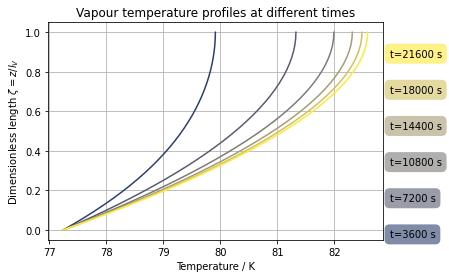

In [5]:
# Visualise the plot
small_tank.plot_tv()

Visualise liquid and vapour heat ingresses, $\dot{Q}_{\text{L}}$ and  $\dot{Q}_{\text{V}}$.

The plot also shows the vapour to liquid heat ingress, $\dot{Q}_{VL}$, and  the partition of the vapour heat ingress that is transferred to the interface by the wall directly, $\dot{Q}_{\text{V,w}}$

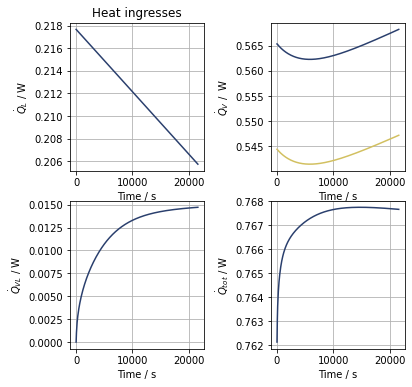

In [6]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank.plot_Q(unit="W")

#### Plot liquid volume

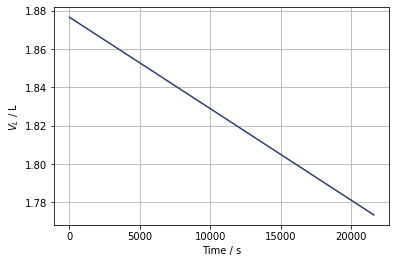

In [7]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank.plot_V_L(unit="L")

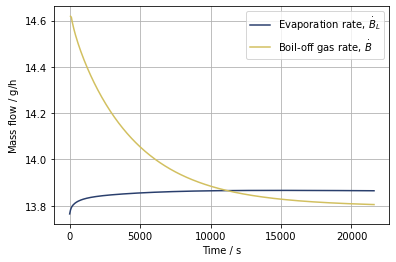

In [8]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank.plot_BOG(unit='g/h')

Optional: CSV data export

If evaporation data is intended to be post-processed in another software, it can be exported readily with the help of the Pandas package.

In [9]:
# Import pandas 
import pandas as pd

In [10]:
# Create dataframe from dictionary
df_evap = pd.DataFrame.from_dict(small_tank.data)

# Save file to the current working directory
df_evap.to_csv('LN2_small_m3.csv')

# Show the first five columns of the dataframe in console
df_evap.head()

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,dV_L,Q_Vw
0,0.0,77.243500,4.557498,0.000000,0.217685,0.565355,0.001877,0.000004,0.000004,0.000000,0.000000e+00,0.544436
1,60.0,77.274901,4.554372,0.001024,0.217652,0.565307,0.001876,0.000004,0.000004,-0.000052,-4.749863e-09,0.544391
2,120.0,77.321524,4.551245,0.001699,0.217619,0.565221,0.001876,0.000004,0.000004,-0.000051,-4.749799e-09,0.544308
3,180.0,77.366738,4.548218,0.002164,0.217586,0.565138,0.001876,0.000004,0.000004,-0.000050,-4.752078e-09,0.544228
4,240.0,77.410842,4.545270,0.002539,0.217553,0.565058,0.001875,0.000004,0.000004,-0.000049,-4.753791e-09,0.544151


#### References




M. Seo, S. Jeong, Analysis of self-pressurization phenomenon of cryogenic fluid storage tank with thermal diffusion model, Cryogenics, 50(9) (2010) 549-555.